In [2]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [3]:
#I am going to find the number of seconds in the month of June
Seconds_in_June = 30 *24 * 60 * 60
Seconds_in_June

2592000

In [3]:
sec_in_day=24*60*60
total_days= 29+31+13+(21.5/24)
total_sec=sec_in_day*total_days
total_sec

6384600.0

In [27]:
# 2a
#Load the table
wp=Table.read_table('world_population.csv')
# wp
pop_2015 = wp.item((2015-1950)-1)
pop_2015


Population
7178722893


In [1]:
# 2b
pop_1950 = wp.item(0)
growth_between = (pop_2015 - pop_1950 ) / pop_1950


In [32]:
# 2c
yrs_between = 65
growth_rate = (pop_2015/pop_1950)**(1/yrs_between)-1

In [13]:
# https://raw.githubusercontent.com/oikobill/Kaggle/master/Titanic/data/train.csv
data = Table.read_table('Titanic_Data.csv') # saved to computer because URL was not working
data.relabel('Pclass','passenger_class')
family_size = data.column('SibSp')+data.column('Parch')
data.with_column('family_size',family_size)

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S,0
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q,0
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S,4
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S,2
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C,1


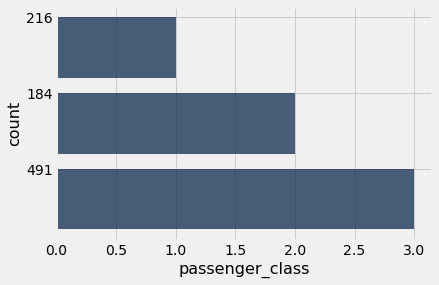

In [19]:
bar_table = data.group('passenger_class')
bar_table.barh('count')

In [25]:
data.sort('Age').show(5)

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,nan,C
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5,nan,S
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,nan,C
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,nan,C
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29,nan,S


In [34]:
data.sort('Age',descending=True)

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,nan,1,2,W./C. 6607,23.45,nan,S
879,0,3,"Laleff, Mr. Kristo",male,nan,0,0,349217,7.8958,nan,S
869,0,3,"van Melkebeke, Mr. Philemon",male,nan,0,0,345777,9.5,nan,S
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,nan,8,2,CA. 2343,69.55,nan,S
860,0,3,"Razi, Mr. Raihed",male,nan,0,0,2629,7.2292,nan,C
850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,nan,1,0,17453,89.1042,C92,C
847,0,3,"Sage, Mr. Douglas Bullen",male,nan,8,2,CA. 2343,69.55,nan,S
840,1,1,"Marechal, Mr. Pierre",male,nan,0,0,11774,29.7,C47,C
838,0,3,"Sirota, Mr. Maurice",male,nan,0,0,392092,8.05,nan,S
833,0,3,"Saad, Mr. Amin",male,nan,0,0,2671,7.2292,nan,C


In [63]:
class_array = data.group('passenger_class')
amount_survived = data.group('Survived')
amount_survived

Survived,count
0,549
1,342


In [78]:
survival = data.select('passenger_class','Survived')
class_count = data.group('passenger_class')
new = survival.group('passenger_class', sum)
percent_survived = new.column('Survived sum') / class_count.column('count')
percent_survived_table = new.with_column('percent survived', percent_survived)
percent_survived_table

passenger_class,Survived sum,percent survived
1,136,0.62963
2,87,0.472826
3,119,0.242363
